# chapter 2 - Supervised Learning
Classification and Regression

Generalization, Overfitting and Underfitting
1. <strong>K-NN 최근접 이웃 (분류/회귀)</strong> : <strong>작은 데이터 셋</strong>에 용이한 기본모델
2. <strong>선형 모델 (회귀예측)</strong> : 처음 시도 용이한 알고리즘으로 <strong>대용량 고차원</strong>에도 가능하다 (일반화가 강하다)
3. <strong>나이브 베이즈</strong> : <strong>분류모델(회귀X)</strong> 선형보다 빠르고 고차원에도 가능, 선형보단 정확도는 낮다
4. <strong>결정나무</strong> : 매우 빠르고 스케일 조절 불필요 (깊이만 제한), 시각화 및 설명에 용이
5. <strong>RandomForest</strong> : 강력하고 안정적, 다만 </trong>고차원 희소 데이터셋에는 부적합</strong>
6. <strong>GradientBoostingDecisionTree</strong> : RandomForest보다 조금 성능이 양호, 학습은 느리나 예측은 빠르고 메모리를 덜 사용한다, 많은 튜닝이 필요
7. <strong>SupportVectorMachine</strong> : <strong>비슷한 특성으로 이루어진 중간 데이터셋</strong>에 잘 맞는다. 매개변수에 민감하고 스케일 조절이 필요하다
8. <strong>신경망 모델</strong> : <strong>대용량 데이터셋</strong>에서 복잡한 모델을 생성가능, 매개변수와 스케일에 민감, 학습시 오랜시간 소요

<br></br>
## 1 지도학습의 개념
분류와 회귀 Classification and Regression

### 01 분류
미리 <strong>가능성이 정의된 클래스 레이블</strong> 중 하나를 예측하는 모델의 생성
1. 이진분류 binary classification  $ex) 예/ 아니오$
2. 다중분류 multiclass classification $ex) 동물분류, 감정분석$

### 02 회귀
<strong>연속적인 숫자</strong> (컴퓨터:부동소수점수, 수학:실수) 데이터를 통한 모델의 예측
출력값이 연속성이 있는지에 따라 분류와 회귀식이 구분된다

### 03 일반화, 과대적합, 과소적합
Generalize, Overfit, Underfit
1. 일반화 (Acc(Train) =.'= Acc(Test)) : 처음보는 데이터에 대해서도 정확하게 예측이 가능할 떄
2. 과대적합 (Acc(Train) > Acc(Test)) : 정보를 많이 사용하여 복잡한 모델을 생성시
3. 과소적합 (Acc(Train) < Acc(Test)) : 정보가 부족하여 다양성을 찾지 못하는 경우

<strong>최적점의 모델</strong>을 찾기 위해서는 모델을 반복적으로 테스트 해야 한다

<img src="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/model_complexity.png" align="left" width='500'>

### 04 모델의 복잡도와 데이터set의 크기
복잡도와 모델크기의 관계
1. 복잡도 : 다양한 데이터 포인트를 활용하여 모델을 생성
2. 모델의크기 : 모델과 함께 병행하여, 데이터양에 의한 결과값의 힘도 주요함에 유의

<br></br>
### 05 다양한 데이터 셋 (data set) 살펴보기
Data Set
#### 1) <strong>2개로 분류</strong> 가능한 데이터 셋
forge Data Set

In [1]:
import matplotlib
matplotlib.rc('font', family='NanumGothic')

In [2]:
import numpy as np
from data import mglearn   # ./data/mglearn 폴더의 *.py 파일들을 활용
# < 본래 도서의 데이터 생성내용 >
# X, y = mglearn.datasets.make_forge()
# np.save('./data/X_01',X)
# np.save('./data/y_01',y)
X = np.load('./data/X_01.npy')
y = np.load('./data/y_01.npy')

X.shape (26, 2)


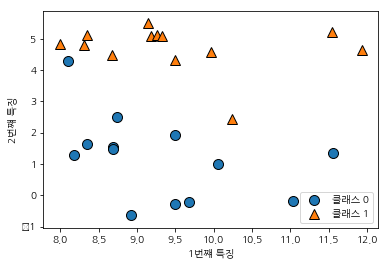

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

mglearn.discrete_scatter(X[:, 0], X[:,1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)     # 데이터 1: 클래스 0, 데이터 2 : 클래스 1
plt.xlabel('1번쨰 특징'); plt.ylabel('2번쨰 특징')
print("X.shape", X.shape)

In [4]:
# 데이터셋1
# 포인트 26개와 특성 2개를 같는 데이터를 생성

#### 2) <strong>Wave</strong>  데이터 셋
Wave Data Set

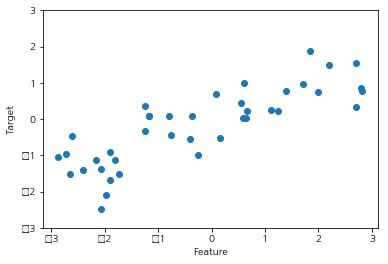

In [5]:
# X, y = mglearn.datasets.make_wave(n_samples = 40)
# np.save('./data/X_02',X)
# np.save('./data/y_02',y)
X = np.load('./data/X_02.npy')
y = np.load('./data/y_02.npy')

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature"); plt.ylabel("Target")

#### 3) <strong>유방암 데이터</strong> 불러오기
load_breast_cancer

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

print("cancer 데이터 모듈의 keys() : {}".format(cancer.keys()))
print("\n유방암 데이터 Shape : {}".format(cancer.data.shape))
print("\n클래스별 샘플 수 :\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print("\nFeature 이름   :\n{}".format(cancer.feature_names))
#cancer.DESCR  # 유방암 데이터에 대한 자세한 정보

cancer 데이터 모듈의 keys() : dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

유방암 데이터 Shape : (569, 30)

클래스별 샘플 수 :
{'malignant': 212, 'benign': 357}

Feature 이름   :
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### 4) <strong>보스턴 주택가격</strong> 데이터 셋
load_boston

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
print("주택 테이터 형태 : {}".format(boston.data.shape))
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : {}".format(X.shape))

주택 테이터 형태 : (506, 13)
X.shape : (506, 104)


<br></br>
## 2 <strong>KNN 알고리즘</strong> 분류/ 회귀
K-Nearest Neighbors
### 01 KNN 학습모델 생성하기
K-Nearest Neighbors

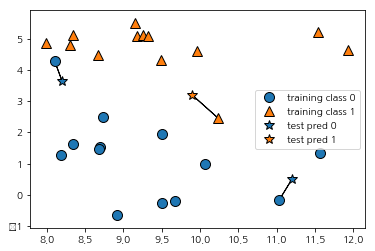

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

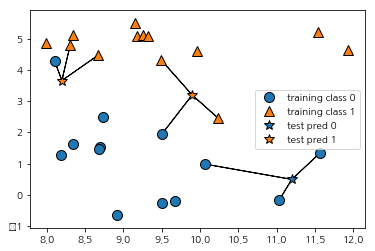

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

In [10]:
# 데이터를 Train (75%)/ Test로 분류 (25%)
from sklearn.model_selection import train_test_split
X, y  = np.load('./data/X_01.npy'), np.load('./data/y_01.npy')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Train 데이터로 학습, test로 모델을 평가
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy   : {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy   : 0.86


### 02 KNN의 결정경계 시각화
Analyzing KNeighborsClassifierKNN

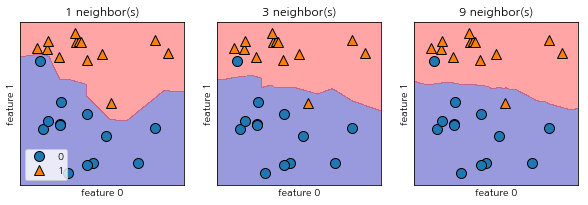

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # .fit메서드는 self 객체를 반환한다. 떄문에 한줄로 데이터입력과 모델생성이 가능
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0"); ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [12]:
# 결론
# 이웃의 갯수가 늘어날수록 결정경계가 더 부드러워 진다 (부드러울수록 단순한 모델이 생성됨을 의미한다)

### 03 모델의 복잡도와  일반화 모델 사이의 관계를 입증
유방암 데이터를 활용

In [13]:
# Import Data Sets
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [14]:
# Build the Model
training_accuracy, test_accuracy  = [], []
neighbors_settings = range(1, 11)  # 1에서 11번

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train)) # 훈련세트의 정확도 'training_accuracy' 저장
    test_accuracy.append(clf.score(X_test, y_test))       # 일반화 정확도 'test_accuracy' 저장

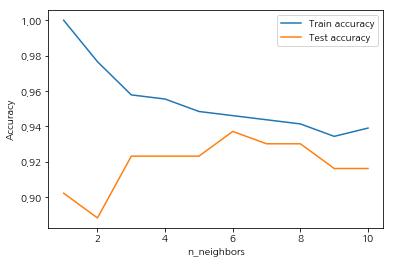

In [15]:
# Visualization    
plt.plot(neighbors_settings, training_accuracy, label="Train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy"); plt.xlabel("n_neighbors"); plt.legend()

아래 그래프의 좌우가 뒤집힌 형태의 그래프를 출력한다
1. 이웃을 1개 사용시 Overfit(과적합), Train에만 들어맞는다
2. 이웃을 10개 사용시 모델이 너무 단순해서 정확가 낮다
3. 중간의 6개가 최적의 모델을 생성함이 판단 가능하다

<img src="https://onlinecourses.science.psu.edu/stat857/sites/onlinecourses.science.psu.edu.stat857/files/lesson04/model_complexity.png"  align="left" width='300'>

### 04 K-최근접 이웃 알고리즘을 활용한 <strong>회귀분석</strong>
k-Neighbors Regression

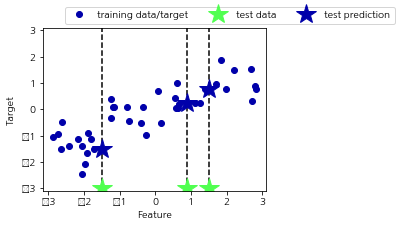

In [16]:
# 이웃이 1일떄
# 개별 점으로 표시
mglearn.plots.plot_knn_regression(n_neighbors = 1, figsize=(4,3))

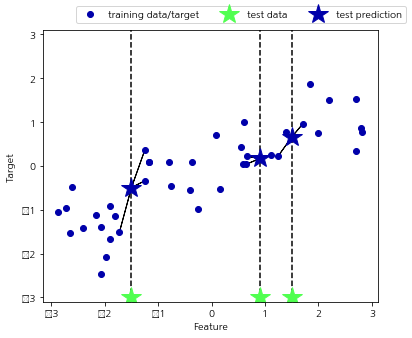

In [17]:
# 이웃이 여럿일떄
# 최근접 이웃 값들의 평균을 예측
mglearn.plots.plot_knn_regression(n_neighbors = 3, figsize=(6,5))

In [18]:
# 40개의 데이터를 생성
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples = 40)
X.shape, y.shape

((40, 1), (40,))

In [19]:
# 훈련/ 테스트 모델로 나누고 KNN 회귀 모델을 생성
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

print("Test set 예측:\n{}".format(reg.predict(X_test)))
print("Test set R^2(결정계수) 예측: {:.2f}".format(reg.score(X_test, y_test)))

Test set 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
Test set R^2(결정계수) 예측: 0.83


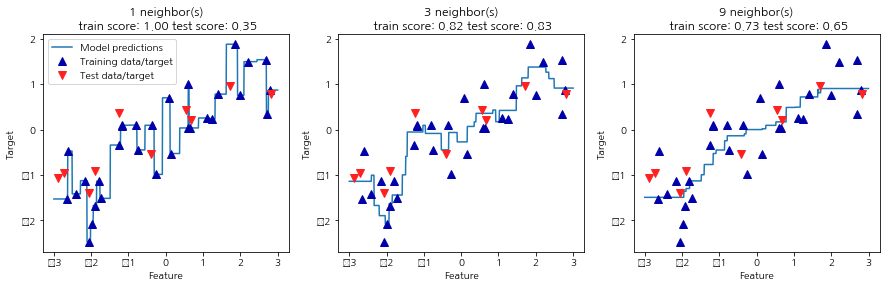

In [20]:
# -3 ~ 3 사이의 1000개 데이터를 생성한다 : Learning rate 반복시 활용할 데
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Visualization
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors) # 1, 3, 9개 이웃의 수를 적용
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8) # 파람 삼각형
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)   # 빨간 삼각형
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature"); ax.set_ylabel("Target")
    
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

In [21]:
# KNN의 특징 정리
# 매개변수로, 1.데이터 거리측정 방법과 2. 이웃의 갯수 를 지정해야 한다
# KNN은 이해하기 용이하지만, 속도가 느리고, 이웃의 갯수의 한계로 현업에서 적극적으로 활용되지는 못한다

<br></br>
## 3 <strong>선형모델</strong>
linear Model
### 01 <strong>회귀 선형모델</strong>
linear Regression

w[0]: 0.393906  b: -0.031804


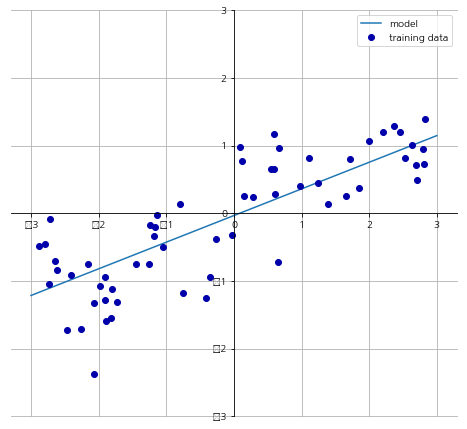

In [22]:
mglearn.plots.plot_linear_regression_wave()

In [23]:
# 결론
# 선형 모델은 직선으로 인한 모델의 제약이 많은 편이다.

### 02 선형회귀 <strong>최소 제곱법 (OLS)</strong> Ordinary Least Squares
평균제곱오차 (mean square error)를 최소화 하는 weight와 bias를 찾는다

Train 모델의 결과값의 출력
1. .coef_     : numpy 배열 (기울기 파라미터(w) : coefficient(계수)/ weight)
2. .intercept : 실수 값 (절편/편향 파라미터(b) - intercept/ offset)

In [24]:
from sklearn.linear_model import LinearRegression

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_      (weight: 가중치(weight)/ 계수(coefficient)) : {}".format(lr.coef_))
print("lr.intercept_ (bias : 편향(offset)  / 절편(intercept))   : {}".format(lr.intercept_))

lr.coef_      (weight: 가중치(weight)/ 계수(coefficient)) : [ 0.39390555]
lr.intercept_ (bias : 편향(offset)  / 절편(intercept))   : -0.03180434302675973


In [25]:
# 모델의 변수값을 메서드로 저장/ 호출이 가능하다
# 메서드 맨 뒤의 '_'는 유도된 속성들에 붙이는 표시이다

In [26]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score    : {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score    : 0.66


In [27]:
# 결과값이 크지 않지만,
# train/ test의 값의 차이가 적은 것은 모델의 안정성이 높다는 의미이다

In [28]:
# Boston 전셋값 데이터를 적용
# 데이터가 104개 컬럼으로 복잡하게 구성
X, y = mglearn.datasets.load_extended_boston()
print('X.shape is : {}'.format(X.shape))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("\nTraining set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score    : {:.2f}".format(lr.score(X_test, y_test)))

X.shape is : (506, 104)

Training set score: 0.95
Test set score    : 0.61


In [29]:
# 컬럼이 104개인 복잡한 데이터인 경우
# 모델의 결과가 train에 과적합 되어 있음을 알 수 있다
# 이 경우에는 복잡도를 제어 가능한 대안을 찾아야 하고, 예로 '릿지 회귀'가 있다

### 03 <strong>릿지 회귀</strong> Ridge Regression
제약조건을 부여한 회귀모델 : 'weight' 값이 0에 가깝도록 제약

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score : {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score     : {:.2f}".format(ridge.score(X_test, y_test)))

Training set score : 0.89
Test set score     : 0.75


In [31]:
# 결과
# 모델생성의 제약조건으로, 덜 과적합된 일반화 모델을 생성한다
# alpha 값이 작으면, 제약이 풀리면서 모델은 단순하게 생성한다 (linear regression와 동일한 모델 생성)
# alpha 값이 크면, 복잡도가 낮아지면서(제약이 쎄짐) 모델 성능은 나쁘지만, 일반화된 모델이 된다

In [32]:
# alpha 자유도 높을 때 (오차가 적다)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))
ridge10.score(X_train, y_train) - ridge10.score(X_test, y_test)

Training set score: 0.79
Test set score: 0.64


0.15244941837855197

In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))
ridge10.score(X_train, y_train) - ridge10.score(X_test, y_test)

Training set score: 0.93
Test set score: 0.77


0.15244941837855197

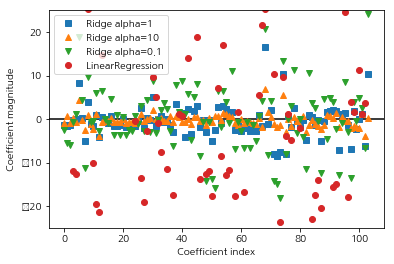

In [34]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim(); plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-25, 25); plt.legend()

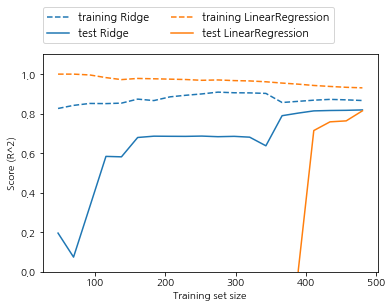

In [35]:
# 모델별 테스트 점수를 비교
mglearn.plots.plot_ridge_n_samples()

In [36]:
# 결과
# LinearRegression 은 데이터가 400개 이상 존재시에만 일반화가 가능하다
# Ridge 모델은 데이터가 적어도 일반화가 가능

### 04 <strong>라쏘 회귀</strong> Lasso Regression
제약조건을 부여한 회귀모델 : L1 규제를 활용하여, Ridge와 유사하게 계수를 0으로 만든다

<strong>L1 규제</strong>(<strong>alpha</strong>= , <strong>max_iter</strong>=) : <strong>feacture 중 일부만 선택</strong>하여 모델을 만든다 (나머지는 계수를 0으로 만든다)

In [37]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score     : {:.2f}".format(lasso.score(X_test, y_test)))
print("사용한 features 수   : {}".format(np.sum(lasso.coef_ != 0)))

[i  for i, num in enumerate(lasso.coef_)  if num != 0]  # Lasso 에서 활성화된 필드를 출력
# 기본 파라미터는 모두 점수가 낮은 '과소적합'을 출력한다 (alpha = 1 을 적용)
# 이를 극복하기 위해서는 1) alpha 는 줄이고, 2) max_iter(반복 실행 최대횟수)를 늘려서 보완한다

Training set score : 0.29
Test set score     : 0.21
사용한 features 수   : 4


[12, 79, 80, 89]

In [38]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score     : {:.2f}".format(lasso001.score(X_test, y_test)))
print("사용한 features 수   : {}".format(np.sum(lasso001.coef_ != 0)))

# alpha를 줄이면서, max_iter 값을 늘리지 않으면, 경고가 발생한다
# alpha를 작게 조절하여 자유도를 높인 상태에서 모델을 생성한 결과, 105 컬럼중 33개만 추출하여 더 유용한 선형 모델을 생성하였다

Training set score : 0.90
Test set score     : 0.77
사용한 features 수   : 33


In [39]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score     : {:.2f}".format(lasso00001.score(X_test, y_test)))
print("사용한 features 수   : {}".format(np.sum(lasso00001.coef_ != 0)))

# alpha를 너무 작게 잡으면, 효과가 무력해져서 과대적합으로 LinearRegression의 결과와 비슷하게 된다

Training set score : 0.95
Test set score     : 0.64
사용한 features 수   : 94


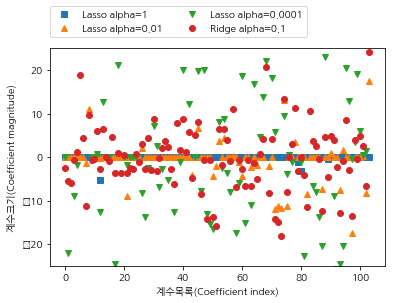

In [40]:
# Visualization 
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.ylim(-25, 25); plt.legend(ncol=2, loc=(0, 1.05))
plt.xlabel("계수목록(Coefficient index)"); plt.ylabel("계수크기(Coefficient magnitude)")

In [41]:
# 결과
# alpha 가 1, 모든 feacture 들이 선형모델에 작용하여 작은 값을 출력한다 (데이터가 뭉개진다)
# alpha 가 0.01, 이 때에도 대부분 특성이 0에 수렴한다
# alpha 가 0.00001, 규제를 받지 않는 자유로운 모델을 출력한다
# 자유로운 모델을 출력하는 Ridge 모델을 실무에서 선호하지만
# lasso.coef_ : Lasso 모델은 어느 필드가 더 선형모델에 유용한 지 판단이 가능하다
# sklearn에서는 Lasso 와 Ridge의 패널티를 결합한 ElasticNet 모듈을 제공한다

### 05 분류형 선형모델 (이진모델)
분류 모델링으로 Logistic Regression , SVC 가 가장 많이 알려져 있다.

이진분류는 선형, 평면, 초평면을 사용하여 두 개의 크래스를 분류한다

회귀 알고리즘이 아닌, 분류모델임에 유의할 것 (이름에 Logistic이 포함됨에 주의)

L1 규제 (가중치 lambda를 활용), L2 규제 (미분을 활용하여 정규항 계산)

1. 'C' 매개변수 : 모델의 규제 강도를 조절
2. 'C' 높은값 설정시 : Train set에 overfit 하고 (개별 데이터를 정확하게 분류하려고 한다)
3. 'C' 낮은값 설정시 : weight는 0에 가깝게 설정된다 (다수의 데이터를 포괄하는 모델을 생성)

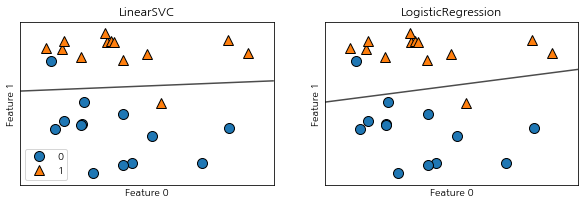

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf,  X,  fill = False,  eps = 0.5,
                                    ax = ax,  alpha = .7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()
# 결과
# 두 모델 모두 1개씩 오분류 하였다. 이는 기본적으로 L2 규제를 사용함을 알 수 있다

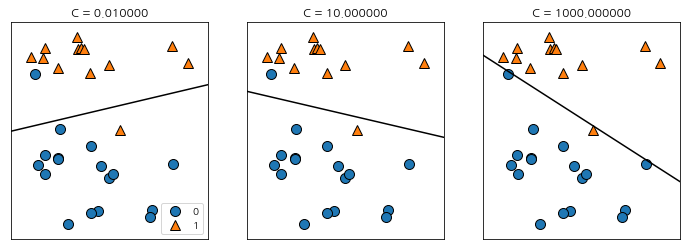

In [43]:
# 'C'값의 변화에 따른 LinearSVC의 변화를 시각화
mglearn.plots.plot_linear_svc_regularization()

# 결과
# 'C'가 10일떄 수평을 이루었고, 
# 'C'가 1,000일 떄에는 결정경계가 확 기울어져 모든 데이터를 잘 분류하였다

In [44]:
# 고차원 분류를, 선형모델에 적용
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score    : {:.3f}".format(logreg.score(X_test, y_test)))

(569, 30) (569,)
Training set score: 0.955
Test set score    : 0.958


In [45]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score    : {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score    : 0.965


In [46]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score    : {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score    : 0.930


In [47]:
# 결과
# 'C' 값이 0.01, 1, 100 모든 경우에 양호한 모델을 생성한다
# 0.01을 사용시 과소 적합으로 모델의 성능이 나쁨을 알 수 있고
# 100을 사용시 세트의 정확도가 증가함을 통해, 복잡도가 높은 모델일수록 성능이 좋음을 알 수 있다

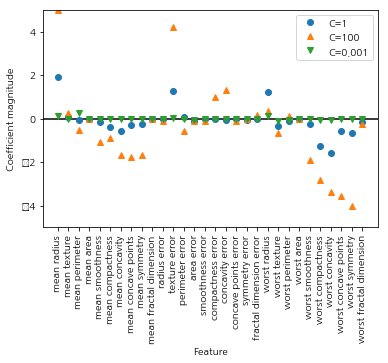

In [48]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim(); plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims); plt.ylim(-5, 5); plt.legend()
plt.xlabel("Feature"); plt.ylabel("Coefficient magnitude")

In [49]:
# 분석결과
# 이진 분류에는, '회귀모델을 활용한 분류'와 '선형모델' 사이에는 유사점이 많다

### 06 다중 클래스 분류형 선형모델
<strong>'로지스틱 회귀 모델'</strong> 제외한 <strong>대부분의 선형분리 모델은 태생적으로 '이진분류'</strong>만 지원한다

'다중 클래스' 분류로 확장하기 위한 보편적인 대안으로 <strong>'일대다 (One-vs-rest)'</strong> 방법을 활용한다.

일대다를 활용하면, <strong>클래스 수 만큼의 이진분류 모델이 생성</strong>되고, 

<strong>모든 이진분류기가 작동시 가장 높은 점수</strong>를 갖는 분류기의 클래스를 최종 모델로 선택하게 된다.

개별 클래스는 weight, bias를 하나씩 갖게 되어 $ w[0]\times x[0] + w[1]\times x[1]....+ w[p]\times x[p] + b $ 모델형태를 갖는다

<strong>로지스틱 회귀 이면</strong>은 <strong>클래스 마다 하나의 weight와 bias</strong>를 갖으며 예측 방법은 동일하다

X data_set : (100, 2) 
y data_set : (100,)
y data : [0 1 2]


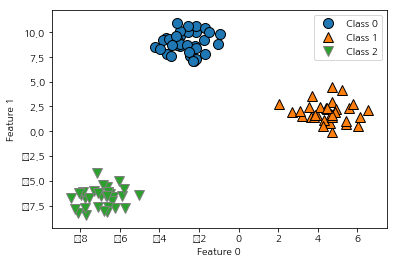

In [50]:
from sklearn.datasets import make_blobs

# 데이터 : 2차원 각 클래스의 데이터는 '정규분포'를 따른다
X, y = make_blobs(random_state=42)
print('X data_set : {} \ny data_set : {}\ny data : {}'.format(X.shape, y.shape, np.unique(y)))

# One vs Rest 방식의 분류기를 활용
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0",  "Class 1",  "Class 2"])

In [51]:
# LinearSVC 분류기를 활용하여 모델을 생성
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 (Coefficient shape : .coef_   ) : ", linear_svm.coef_.shape)
print("절편 배열의 크기 (Intercept shape : .intercept_) : ", linear_svm.intercept_.shape)

계수 배열의 크기 (Coefficient shape : .coef_   ) :  (3, 2)
절편 배열의 크기 (Intercept shape : .intercept_) :  (3,)


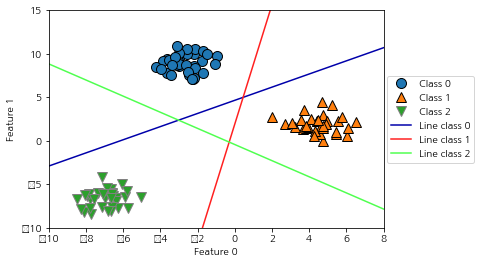

In [52]:
# 각 point 의 scatter plot 출력
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 

# LinearSVC 분류기를 활용하여 생성된 3개의 분류 모델을 시각화
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
# 순서대로 matching 한다
plt.legend(['Class 0', 'Class 1', 'Class 2',
            'Line class 0', 'Line class 1','Line class 2'], 
            loc = (1.01, 0.3))  # 3개의 모델을 별도로 구분하여 시각화

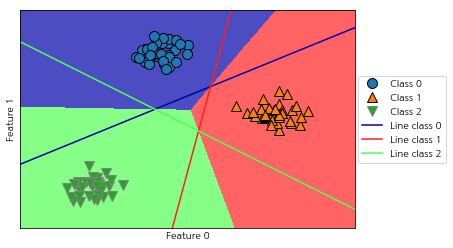

In [53]:
# Linear_SVM 의 모든 지점에 대한 평면 예측결과를 출력
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# LinearSVC 분류기를 활용하여 생성된 3개의 분류 모델을 덧붙여서 시각화
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 
            'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [54]:
# 결론
# 평면의 모든 점의 분류를 시뮬레이션 해본 결과
# 3개의 분류직선이 겹치는 중앙의 영역은 가장 분류가 세밀하게 이루어진 구역이다


### 07 선형모델의 장단점과 매개변수
<h4><strong>회귀모델</strong> : <strong>alpha</strong> (값이 클수록 모델은 단순해진다)</h4>
<h4><strong>LinearSVC, LogisticRegression</strong> : <strong>C</strong> (값이 작을수록 모델은 단순해진다)</h4>
매개변수의 최적값은 <strong>Log Scale 단위(0.01, 0.1, 1, 10, 100)로</strong> 변화를 하며 최적값을 찾는다

그리고 기본적으로는 <strong>L2규제</strong>를 사용하고, 

중요특성이 많지 않거나, 개별 특성간 비교시 <strong>L1규제</strong>(몇가지 단순한 규제를 적용)를 사용한다

선형모델의 특징은 학습속도와 예측이 빠르고, 희소한 데이터셋에서도 잘 작동한다

샘플이 수십,백만개로 이루어진 경우에는 <strong>solver='sag'</strong> 옵션을 주거나

<strong>SGDClassifier, SGDRegressor</strong>를 사용한다

<strong>선형모델의 장점은 예측과 해석이 쉽다</strong>는 점 때문에, 샘플의 특성이 많을 떄 잘 작동한다

특히 다른모델로 학습하기 어려운 <strong>매우 큰 데이터셋</strong>에서도 선형모델을 많이 사용하고

대신 <strong>저차원의 데이터셋은 다른 모델들이 일반화 성능이 더 좋다</strong>

In [55]:
# 한 줄의 코드로 학습 후 모델객체를 생성한다
logreg = LogisticRegression().fit(X_train, y_train)

In [56]:
# .fit() 메서드 연결을 활용하여 2줄로 연결
# logreg = LogisticRegression()
# y_pred = logreg.fit(X_train, y_train).predict(X_test)

# 위의 내용을 한 줄의 코드로 학습 후 모델객체까지 생성
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

In [57]:
# 결론
# 하지만 1줄로 모든걸 작업하는건 추천하지 않는다a

<br></br>
## 4 <strong>나이브 베이즈</strong> 분류기
### 01 분류기 설명
선형모델들 보다 속도는 빠르지만, 모델의 일반화 성능이 조금 떨어지는 단점이 있다

각 특성을 개별적으로 취급하여 학습 및 통계를 취합하는 특성때문이다
1. <strong>GaussianNB</strong> : 연속적인 데이터에 적용 (클래스 특성의 <strong>표준편차와 평균</strong>을 저장)
2. <strong>BernoulliNB</strong> : 이진 데이터에 적용
3. <strong>MultinomialNB</strong> : 카운트 데이터(특성을 <strong>'정수count'</strong>로 변환한 데이터)에 적용 (클래스 특성의 <strong>평균</strong>을 계산 )

<strong>BernoulliNB, MultinomialNB</strong> 은 선형모델과 비슷하여, Text 데이터를 분류시 활용한다

In [58]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

counts = {} # 클래스 마다 반복, 특성마다 1이 나타난 횟수를 센다
for label in np.unique(y):
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n {}".format(counts))

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


In [59]:
# 해석
# 데이터 1만 카운팅이 가능하다 (cf) 0은 None)
# y 클래스 값이 0인경우 (y가 0인 index를 Masking) : 1 , 3번쨰 인덱스 1 의 출현빈도를 컬럼별 카운드
# y 클래스 값이 1인경우 (y가 1인 index를 Masking) : 2 , 4번쨰 인덱스 1 의 출현빈도를 컬럼별 카운드

### 02 장단점과 매개변수
<strong>BernoulliNB, MultinomialNB</strong> 의 <strong>alpha 값</strong>(크면 모델이 완만)은 성능향상에는 미비한 영향을 미친다

<br></br>
## 5 <strong>결정 트리</strong> (분류/회귀)
두개의 대답을 통해 내용을 분류한다
### 01 Sample

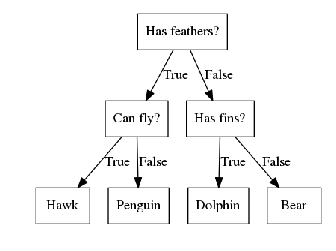

In [60]:
mglearn.plots.plot_animal_tree()

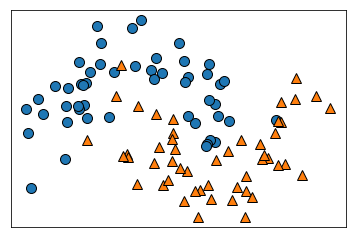

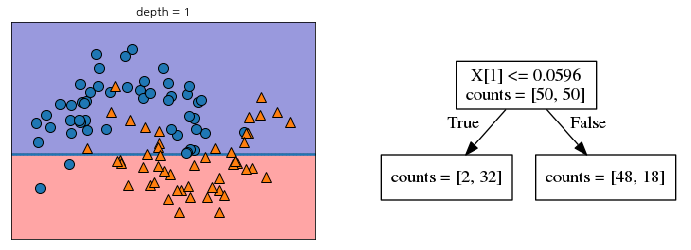

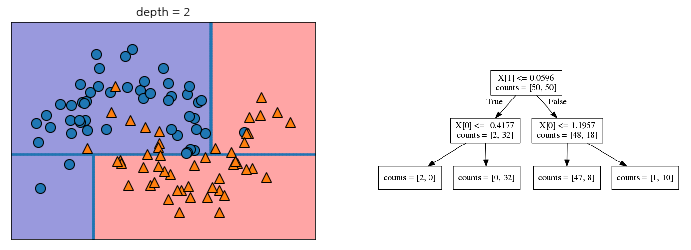

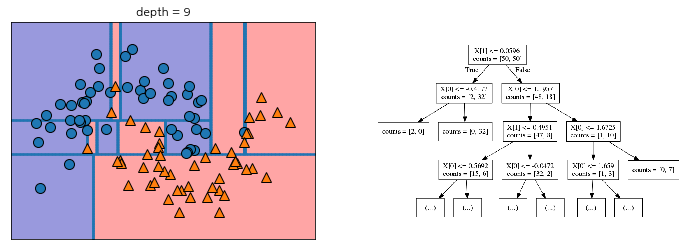

In [61]:
mglearn.plots.plot_tree_progressive()

### 02 <strong>결정 트리 만들기/ 복잡도 제어하기</strong>
Controlling complexity of decision trees

In [62]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, 
    stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set    : {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set    : 0.937


In [63]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### 03 <strong>결정 트리 분석</strong>
시각화를 통한 결정트리 내용 분석하기

https://pypi.python.org/pypi/graphviz

In [64]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

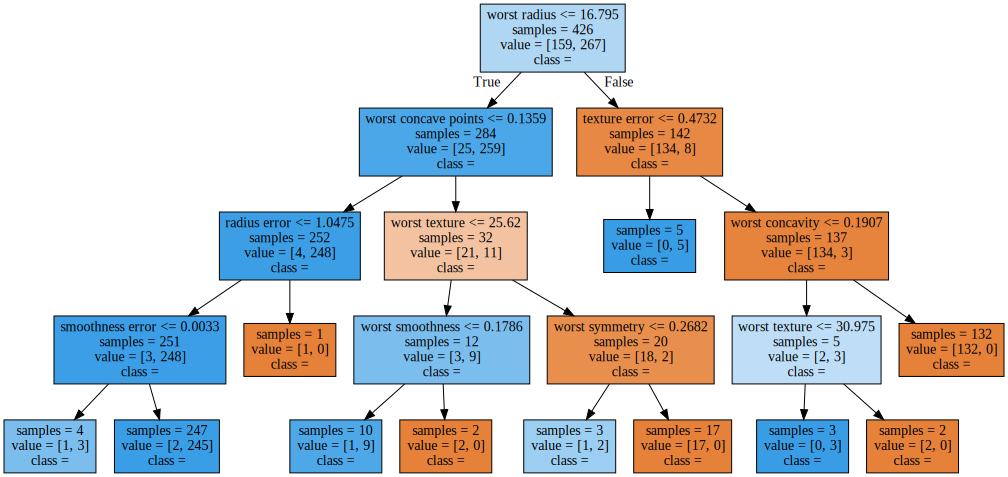

In [65]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph),)

In [66]:
# 결과의 해석
# Tree의 깊이가 4단계만 들어가도 시각화가 복잡해진다
# 개별 node 의 samples : 노드에 해당하는 샘플의 수
# 개별 node 의 value   : 클래스 단위 해당하는 샘플의 수  
#                      ex) [ 왼쪽 edge 샘플수 , 오른쪽 edge 샘플수] - edge는  해당 샘플수를 나누며 가지치기가 이어진다. 

### 04 <strong>트리의 특성 중요도</strong>
feature importance : 결정나무의 결정 속성에 <strong>각 특성이 얼마나 중요도</strong>를 판단

0 (중요도 낮음) < 중요도 < 1 (중요도 높음) : 총 합은 1이 된다

In [67]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


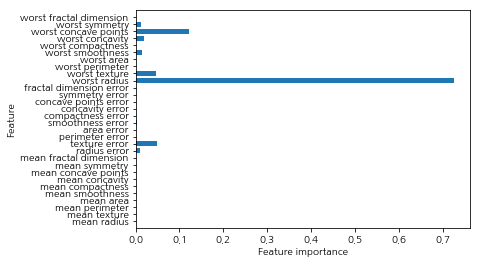

In [68]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)  # y축에 이름 붙이기 ( index, 이름 list)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

In [69]:
# 결과해석
# 중요도가 낮아서 덜 중요한 객체는 아니다
# 다른 객체가 같은 정보를 포함해서 그런 결과를 도출하기도 한다
# 특성 중요도는 항상 양수로, 긍정/ 부정 어느 클래스에 영향을 미치는 지는 알 수 없다

Feature importances: [ 0.  1.]


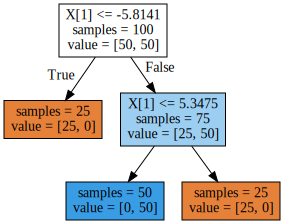

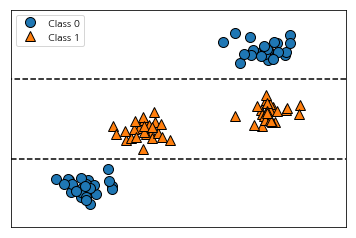

In [70]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

### 05 회귀 결정 트리
DecisionTreeRegressor

메모리 데이터 가격변화 동향 분석 
ram_prices.date : (333,),
ram_prices.price : (333,) 


/home/markbaum/Python/python36/lib/python3.6/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/home/markbaum/Python/python36/lib/python3.6/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


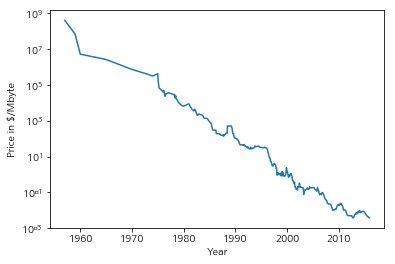

In [71]:
import os
import pandas as pd
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

print('메모리 데이터 가격변화 동향 분석 \nram_prices.date : {},\nram_prices.price : {} '.\
                              format(ram_prices.date.shape, ram_prices.price.shape))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year"); plt.ylabel("Price in $/Mbyte")

In [72]:
# 결과 해석
# 메모리 가격변화를 기간과, 가격 데이터 2개의 컬럼을 불러왔다

In [73]:
from sklearn.tree import DecisionTreeRegressor
# 2000년 을 기준으로, 이전 데이터를 Train, 이후 데이터를 Test로 생성
data_train = ram_prices[ram_prices.date < 2000]
data_test  = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성을 이용한다
X_train = data_train.date[:, np.newaxis]
# 데이터와 Target의 관계를 간단하게 변환하기 위해 Log Scale로 데이터를 변환
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 전체기간을 대상으로 예측을 시도한다
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# log-transform 결과를 원본 형태로 되돌린다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/home/markbaum/Python/python36/lib/python3.6/site-packages/matplotlib/mathtext.py:866: MathTextWarning: Font 'default' does not have a glyph for '-' [U+2212]
  MathTextWarning)
/home/markbaum/Python/python36/lib/python3.6/site-packages/matplotlib/mathtext.py:867: MathTextWarning: Substituting with a dummy symbol.
  warn("Substituting with a dummy symbol.", MathTextWarning)


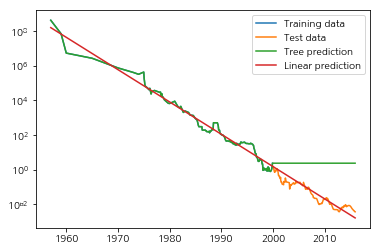

In [74]:
# 분석 결과를 시각화
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [75]:
# 결과해석
# 선형모델 (red-line) : 데이터를 근사하게 예측하여 모델의 일반화가 높다
# Tree모델 (green-line) : Train 데이터를 환벽하계 숙지하여 모델을 생성, 데이터 범위 밖은 마지막 데이터로 결과를 출력한다

In [76]:
# 결정모델의 장점 단점 정리
# 장점으로는
# 1. 모델의 구현이 쉽다
# 2. 데이터 스케일에 제한을 받지 않는다
# 3. 특성이 개별적으로 처리되어, 정규화/ 표준화 등의 전처리 과정이 불필요하다
# 4. 데이터 특성이 이질적이거나 혼합되어 있어도 잘 작동한다

# 단점으로는
# 1. Train 데이터에 과대적합한 모델을 생성한다
# 2. 때문에 일반화 성능이 떨어진다
# 3. 단점극복을 위해 - 앙상블 기법을 사용한다

<br></br>
## 6 결정 트리의 앙상블 기법
ensemble 기법
1. Random forest
2. Gradient Boosting 

### 01 Random forest
랜덤 포레스트는 <strong>과적합을 회피</strong>하는 방법으로, 조금씩 다른 여러 Tree의 묶음으로 모델을 예측한다

이는 <strong>과적합 모델을 여럿</strong> 생성 후, <strong>이들의 평균</strong>으로 대표하는 모델을 만들면 과적합이 줄어듬을 수학적으로 증명되었다

다양한 모델을 여럿을 만들기 위해 <strong>최초 생성을 초기값</strong>을 무작위의 숫자를 주입한다

<h4>1) Random Forest 의 생성</h4>
생성할 Tree의 갯수를 정해야 한다

최초 생성을 위한 <strong>Bootstrap Sample</strong>을 생성한다

http://blog.naver.com/PostView.nhn?blogId=leerider&logNo=100189402336

이는 n-samples개의 데이터 포인트 중 무작위로 n-sample횟수만큼 반복하여 추출하여 결정 Tree를 만든다.

핵심 매개변수로 <strong>max_features</strong>를 사용하는데,


max_features = <strong>1</strong> : 테스트 특성을 분별없이 선택하여, random Tree의 높이는 비슷해진다

max_features <strong>작을떄</strong> : Tree들이 다양해져서, random Tree의 높이가 깊어진다

<h4>2) Random Forest 분석</h4>
5개의 Decision Tree를 통해서 Random Foreset 를 생성한다

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 100, noise = 0.25, random_state = 3)
print('X is : {}, \ny is : {}'.format(X[:2], np.unique(y)))
X.shape, y.shape

X is : [[ 1.87756309  0.56839425]
 [ 0.36877983 -0.34894509]], 
y is : [0 1]


((100, 2), (100,))

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)
forest = RandomForestClassifier(n_estimators = 5, random_state = 2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5, n_jobs=1, oob_score=False, random_state=2,
            verbose=0, warm_start=False)

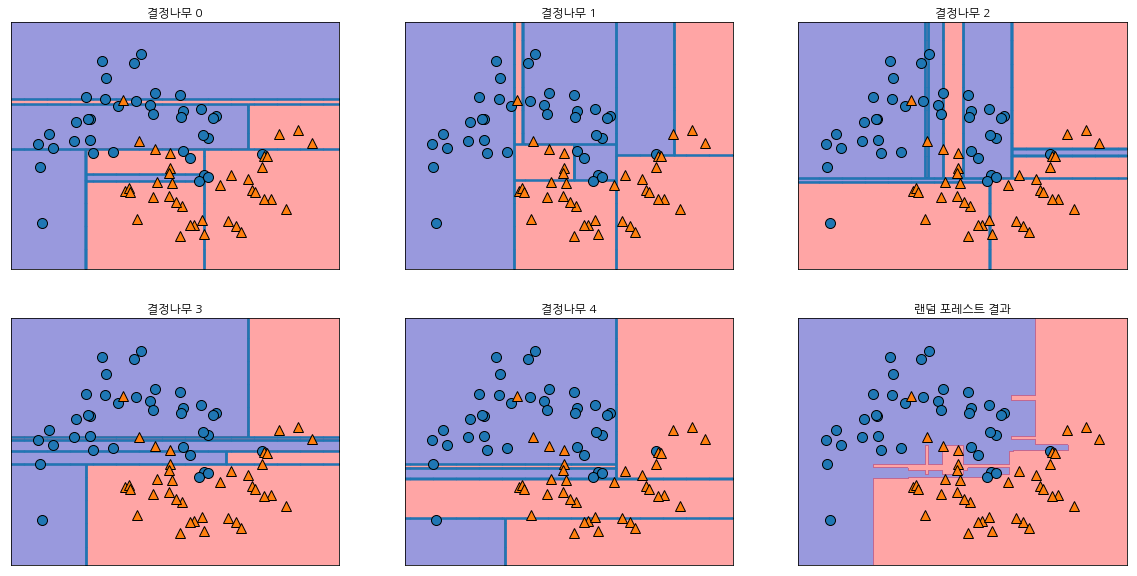

In [79]:
# 개별 결정나무 0,1,2,3,4 를 출력
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("결정나무 {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax = ax)

# 마지막 RandomForest 결과를 출력
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("랜덤 포레스트 결과")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [80]:
# 결과 해석
# 개별 Tree 에서 학습된 ,Decision Tree 들은 forest.estimators_ 에 저장되어 있다
# 아래의 표는, Tree1, 2, 3, 4, 5 , Random Tree 의 결과를 출력한 결과이다
# Random Forest는 덜 과적합된 좋은 결정경계를 생성한다.
# 실전에서는 더 많은 Tree를 사용하므로 더 부드러운 결정경계 모델을 생성한다

<h4>3) Random Forest 분석 2</h4>
100개의 필드로 구성된 <strong>'유방암분석 데이터'</strong>를 적용하여 모델생성하기

Accuracy on training set: 1.000
Accuracy on test set    : 0.972


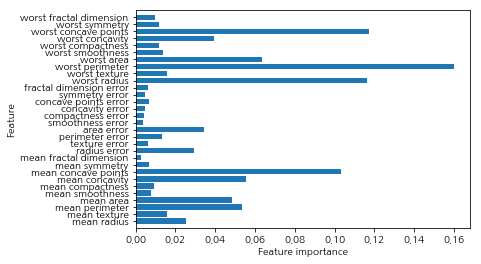

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set    : {:.3f}".format(forest.score(X_test, y_test)))
plot_feature_importances_cancer(forest)

In [82]:
# 별도의 매개변수 튜닝 없이도, 선형/단일모델 결정 Tree보다 높은 97% 정확도를 나타낸다
# 즉 1개의 Tree 보다, 랜덤포레스트로 모델생성시 신뢰도가 훨씬 높아진다
# 이는 개별 특성의 기여도만 보아도, 다양한 특성들의 영향으로 중요도를 찾아 나아간다

In [83]:
# 마무리 정리
# 특징
# 의사결정이 단순한 경우에는, 단일 Tree가 더 적합하다 (비전문가에게 예측결과를 직관적 표현시 적합)
# 다수의 필드를 포함한 데이터셋인 경우, n_jobs의 매개변수로 코어를 분산처리하면 모델생성이 빨라진다
# 단점 
# random_state 값에 따라 모델의 결과가 달라지지만, 이는 모델갯수가 많아지면 변동이 적어진다
# 차원이 높고 데이터가 희소한 경우는 잘 안맞고, 이때는 '선형모델'이 적합하다
# 매개변수
# n_estimators, max_features가 주요 매개변수이고, max_depth 같은 옵션으로 설정이 가능하다
# n_estimators는 값이 클수록 유용하다
# max_features는 각 tree의 무작위도로써 값이 작을수록 과적합을 줄여준다

### 02 Gradient Boosting의 회귀Tree
이 모델은 <strong>회귀</strong>와 <strong>분류</strong> 모든 작업에 활용이 가능하다

과적합 방지를 위해, 순차적으로 Tree를 생성 후, <strong>강력한 가치지기 작업</strong>을 통해서 모델을 생성한다

이는 가지의 깊이가 깊지않고, 메모리도 적게 사용하며 예측 속도도 빠른 장점이 있다
1. learning_rate : 오차를 얼마나 강하게 보정할 것인지를 제어하는 매개변수
2. n_estimators : 앙상블 Tree의 갯수로써, 복잡도의 단일 Tree의 오차정정 기회를 부여

In [84]:
# 유방암 데이터를 활용한 모델의 생성
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

In [85]:
# 기본 Gradient Boosting 모델
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set    : {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set    : 0.958


In [86]:
# 모델해석
# train 데이터에 100% 과적합된 모델을 생성한다.

In [87]:
# max_depth = 1 일 떄 생성모델
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [88]:
# learning_rate = 0.01 일 떄 생성모델
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


In [89]:
# 모델해석
# 위의 두 모델은 복잡도를 감소시키므로 훈련의 정화도는 낮아졌지만,
# Tree의 깊이를 낮춤으로써 모델 성능향상에 크게 기여를 하였다.

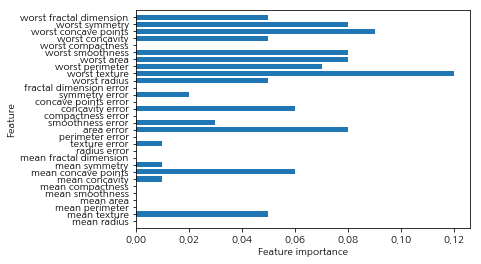

In [90]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

In [91]:
# 결과해석
# RandomForest와 비슷하게 다영한 Factor들을 반영한 모델을 생성하였다.
# 실무에선 보다 안정적인 RandomForest를 먼저 활용하여 모델을 생성한다.
# 대신 시간이 충분하고 보다 강력한 모델생성을 위해서 Gradient Boosting을 추가로 학습한다

In [92]:
# 장단점과 매개변수
# 단점은 시간이 오래 걸린다는 점이다
# DecisionTree의 특성상 희소한 데이터에서는 모델을 생성하기 어려운 공통적인 단점이 존재한다.
# 매개변수
# n_estimators 와 learning_rate를 통해서 조절한다
# 1. n_estimators : Tree의 갯수를 조정한다 (값이 클수록 복잡하고 과적합된 모델이 생성된다)
# 2. learning_rate : Tree의 오차값을 보정한다 (값이 작으면 보다 정교한 모델이 생성된다)
# 조절순서는 n-estimator를 먼저 조절한 뒤, learning_rate 값을 찾는다
# 3. max_depth : Tree의 복잡도로써, 깊어지지 않도록 5보다 작은 값으로 강제한다

<br></br>
## 7 <strong>커널 서포트 벡터 머신</strong>
Kernalized support vector machines
단순 초평면이 아닌 <strong>복잡모델</strong>을 생성가능하도록 개량한 모듈이다
1. SVC를 사용한 <strong>분류 문제</strong>를 해결 가능하다
2. SVR의 <strong>회귀문제</strong>에도 같은 개념을 적용 가능하다

### 01 선형 모델과 비선형 특성
저차원 에서는 선형모델이 제한적으므로, 유연한 선형모델을 만들기 위해서는 
1. 특성의 값끼리 곱하거나
2. 특성을 거듭제곱하는 방식으로 새로운 특성을 추가한다

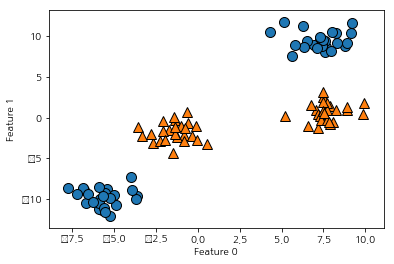

In [93]:
# 저차원 모델로 분류하기 어려온 모델데이터를 생성한다
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

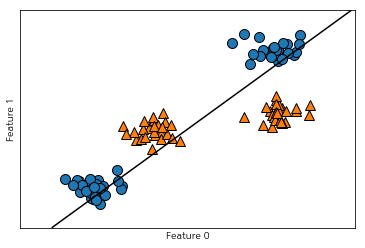

In [94]:
# 선형 SVC로 모델링을 한다
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [95]:
# 결과해석
# 예측한 대로 모델의 분류가 적절하게 이루어지지 않는다
# 이를 보완하기 위해 특성 1 ** 2 를 새로운 특성으로 추가하여 특성을 확장한다
# 이를통해 '특성 0, 1'의 분류에서 '특성 0, 특성 1, 특성 1 ** 2)의 3차원 데이터 포인트로 3차원 산점도 분류를 실시한다

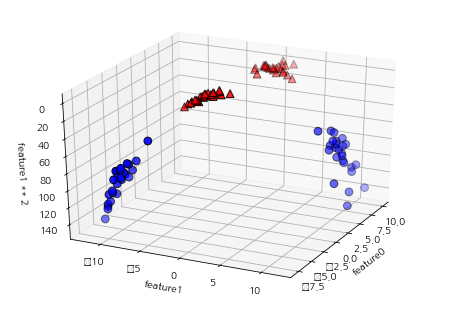

In [96]:
# 두 번쨰 특성을 제곱한 모델을 생성한다
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26) # 3차원 데이터 출력

# y==0 포인트를 먼저 그리고, y == 1 포인트를 그린다
mask = y == 0                            
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap = mglearn.cm2, s = 60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap = mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

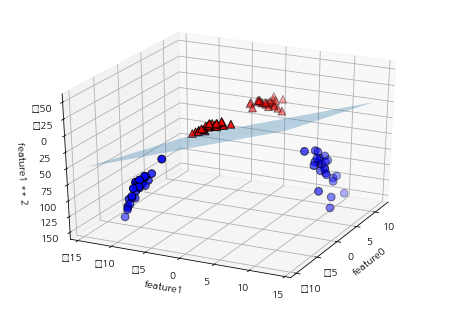

In [97]:
# 3차원으로 분류된 데이터 위에, 선형분류모델을 추가한다
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(),  linear_svm_3d.intercept_

# 위의 y==0, 1 인 개별 포인트들을 시각화
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

# 선형 분류 모델을 시각화 한다
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.set_xlabel("feature0"); ax.set_ylabel("feature1"); ax.set_zlabel("feature1 ** 2")

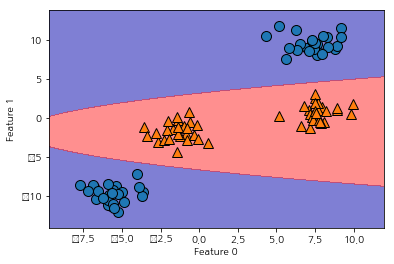

In [98]:
# 3차원으로 분류시 결과가 명확하게 보이는 장점이 존재한다
# 이를 원래특성으로 2차원에 투영해 보면, 그 특징을 더 정확하게 알 수 있다
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0"); plt.ylabel("Feature 1")

In [99]:
# 모델해석
# 분류 결과가 타원형태임을 확인할 수 있다

### 02 커널기법
유방암 데이터는 비선형적 특징 (2차원 쌍곡선)을 추가하여 강력하게 완성하였다

하지만 대부분의 경우는 어떤 특성을 추가해야 하는지 알기 힘든 경우가 많으므로, 수학적 기교를 활용한

<strong>고차원 분류기(각 데이터 포인트의 거리를 스칼라 곱으로 연산)</strong>로 학습을 할 수 있다. 이를 <strong>'커널기법'</strong>이라고 한다
1. <strong>다항식 커널</strong> : 각 특성들에 가능한 조합을 지정된 차수까지 계산
2. <strong>가우시안 커널(Radical Basis Function)</strong> : 차원이 무한한 특성공간에 매핑 (개별 특성의 중요도는 고차원일수록 낮아진다)

### 03 SVM 이해하기
모델생성시 경계에 가까운 일부 데이터들이 영향을 미치는데, 이러한 <strong>경계에 위치한 데이터</strong>를 <strong>Support Vector</strong>라 부른다

이러한 기반위에 각 포인트들의 서포트벡터와의 거리를 츨정한 결과로 훈련과정에 학습을 한다 (<strong>가우시안 커널</strong>로 거리를 측정)
$$ k_{rbf} (x_1, x_2) = exp(-\gamma || x_1, x_2 ||^2)$$
$|| x_1, x_2 ||$는 <strong>유클리드 거리</strong>이고 $\gamma $ 는 <strong>가우시안커널의 폭</strong>을 제어하는 매개변수다

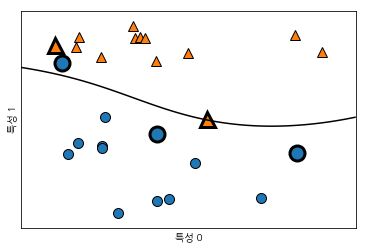

In [100]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

sv = svm.support_vectors_ # 서포트 벡터를 출력
# dual_coef_의 부호에 의해서, 서포트 벡터 클래스의 레이블이 결정
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [101]:
# 모델의 해석
# SVM은 부드러운 비성형 경계를 생성한다 

### 04 SVM 매개변수 튜닝
$$ k_{rbf} (x_1, x_2) = exp(-\gamma || x_1, x_2 ||^2)$$

$\gamma $ 는 <strong>가우시안커널 폭의 역수</strong>로 하나의 샘플이 미치는 영향의 범위를 결정한다
1. $\gamma $ 값이 작은경우 : 넓은 영역 범위를 지정하고
2. $\gamma $ 값이 클 경우 : 영향의 범위가 제한적이 된다

$C$ 매개변수는 선형모델과 같은 규제 매개변수이다
1. $C$값은 각 포인트의 중요도(dual_coef_) 를 제한한다 

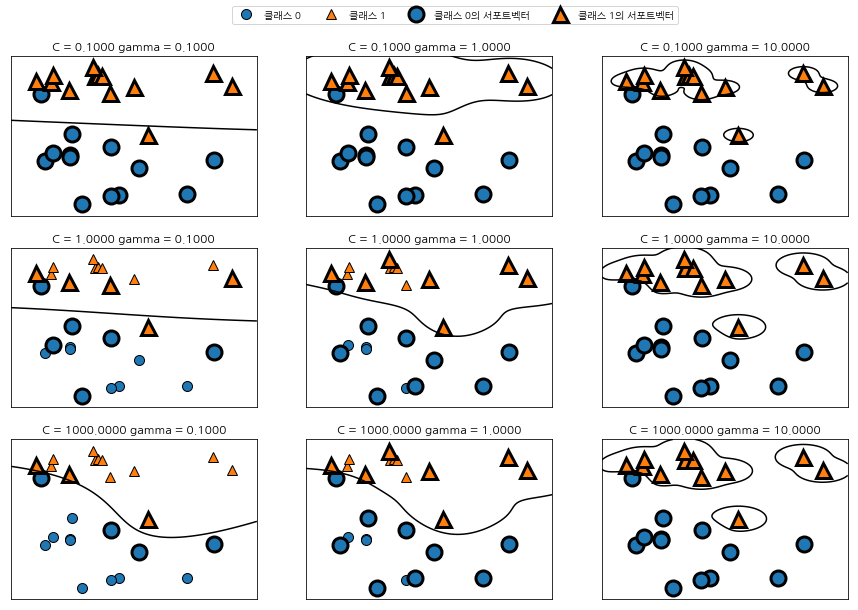

In [102]:
# C 값을 변화할 경우, 생성된 모델을 비교한다
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["클래스 0", "클래스 1", 
                   "클래스 0의 서포트벡터", "클래스 1의 서포트벡터"],
                  ncol=4, loc=(.9, 1.2))

In [103]:
# 결과해석
# 왼쪽에서 오른쪾으로 가면서 Gamma 값을 0.1 ,1 ,10 으로 증가시킨다 (큰값 (민감) < 거리측정 간격 < 작은값 (둔감)
# 작은 Gamma : 많은 포인트들이 가까운 것으로 판단하여 부드러운 모델을 생성
# 큰 Gamma : 개별 포인트에 민감하게 반응하여 복잡한 모델을 생성

# 위에서 아래로 가면서 C 값을 0.1, 1, 1000으로 증가시켰다 (큰 값 < 모델의 일반화 조절 < 작은 값)
# 작은 C : 모델의 제약이 많아 각 포인트의 영향력은 적다 (일반화 속성을 강하게 부여)
# 큰 C : 포인트들이 모델에 영향을 강하게 주어, 결정경계를 정확하게 분류한다

In [104]:
# 매개변수를 기본 값으로 모델을 생성
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set    : {:.2f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set    : 0.63


In [105]:
# 결과
# Train 데이터에 과적합된 모델이 생성된다
# 이와같이 SVM은 잘 작동하지만, 매개변수 scale에 따라 모델이 큰 영향을 받는다

In [106]:
X_train.shape

(426, 30)

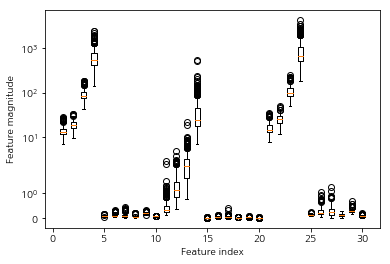

In [107]:
plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [108]:
# 위와 같이 데이터겂의 크기가 차이가 많이나는 경우
# 일반 모델에선, 정규화/ 표준화로 해결하는데
# 위의 분류를 SVM을 활용하여 해결해보자

### 05 <strong>SVM 분석 </strong>을 위한 데이터 전처리
데이터 값들이 비슷한 범위에 분포하도록 0 ~ 1 사이의 값으로 변환(정규화)한다

In [109]:
min_on_training = X_train.min(axis = 0) # 특성별 최소값을 계산
range_on_training = (X_train - min_on_training).max(axis = 0) # 특성별 범위를 계산

# Train 개별 데이터를, 최소값을 빼고 범위로 나누면, 0~1사이의 값들로 변환된다 (정규화)
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n {}".format(X_train_scaled.min(axis = 0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis = 0)))

Minimum for each feature
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
Maximum for each feature
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [110]:
# Test 데이터에도 같은 작업을 한다
X_test_scaled = (X_test - min_on_training) / range_on_training
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set    : {:.3f}".format(svc.score(X_test_scaled,  y_test)))

Accuracy on training set: 0.948
Accuracy on test set    : 0.951


In [111]:
# 결과의 해석
# 데이터 값을 조절한 결과, 모델의 결과값이 달라졌다

In [112]:
# 다음은 C 와 Gamma 갑을 증가시켜 복잡한 모델을 생성해보자
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("Accuracy on test set    : {:.3f}".format(svc.score(X_test_scaled, y_test)))

# 결과의 해석
# C 값을 증가시킨결과 모델의 성능이 향상된 결과를 출력한다

Accuracy on training set: 0.988
Accuracy on test set    : 0.972


In [113]:
# 장단점
# 커널SVM은 다양한 데이터셋에서도 잘 작동한다
# 고차원 모델에서도 잘 작동하지만, 샘플이 많으면 성능이 떨어진다 
# 10,000개 정도는 잘 작동하나, 100,000개 이상인 경우, 메모리 관점에서 문제가 발생 가능하다
# 전처리와 매개변수 설정에 민감하게 반응한다
# 예측결과를 비 전문가에게 설명하기 난해하다 

# 적합한 경우
# 모든 특성이 비슷한 단위를 갖고, 스케일이 비슷한 경우에 적합하다

<br></br>
## 8 신경망 모델 (Deep Learning)
다층 퍼셉트론 MLP(Multi_Layer Perceptron) 모델링

### 01 신경망 모델
The Neural Network Model

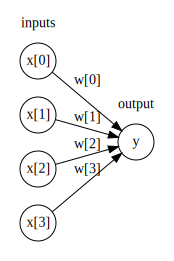

In [114]:
display(mglearn.plots.plot_logistic_regression_graph())

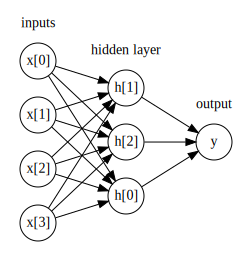

In [115]:
display(mglearn.plots.plot_single_hidden_layer_graph())

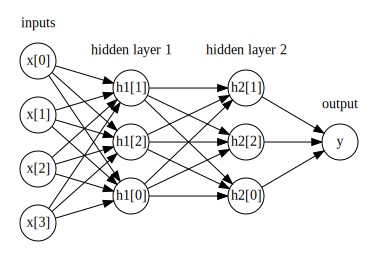

In [116]:
mglearn.plots.plot_two_hidden_layer_graph()

In [117]:
# 다중 레이어의 경우
# 왼쪾의 입력 노드를 ,연결선은 학습된 계수를 표현한다
# 오른쪽 노드는 입력의 가중치 합, 즉 출력을 나타낸다
# 결과적으로 최종결과를 산출하기 위해, Hidden Layer의 가중치 합을 계산한다

# Hidden Layer 
# 가중치를 합산한 결과는, 하나의 가중치 합과 다르지 않다
# Hidden Layer를 Relu/ Hyper Tangent 등을 활용하여 복잡한 모델을 생성가능하다

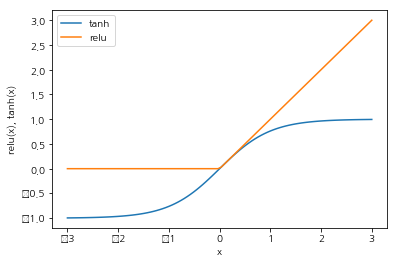

In [118]:
# Sigmoid, Relu 함수를 시각화
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x"); plt.ylabel("relu(x), tanh(x)")

### 02 신경망 튜닝
다층 퍼셉트론 모델을 구현하는 MLPClassifier를 적용해보자

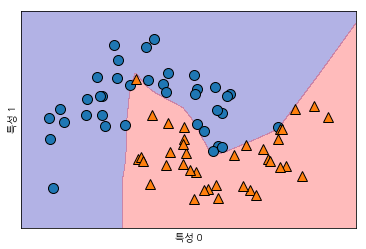

In [119]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                    stratify=y, random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [120]:
# 모델해석
# 100개 데이터를 해석하는데, 은닉 유닛을 100개 사용하여 분석하였다
# 결과는 부드러운 곡선경계를 생성하여
# 보다 효율성을 높이기 위하여, 은닉 유닛을 줄여도 같은 결과를 도출 가능하다

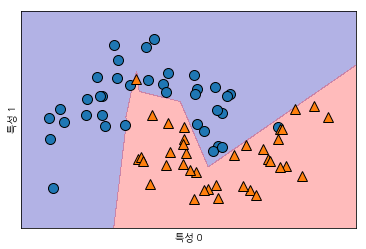

In [121]:
# hidden_layer_sizes=[10] : 은닉층이 1개인 10개의 모듈
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [122]:
# 모델해석
# 기본으로 Relu 비선형 함수를 사용하였다.
# 은닉층이 1개인 10개의 모듈을 합쳐서 모델을 생성
# 은닉 유닛이 10개여서 날카롭지만 비숫한 결과를 도출

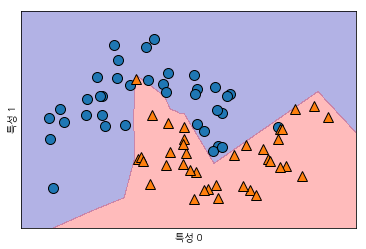

In [123]:
# hidden_layer_sizes=[10, 10] : 2개의 은닉층을 갖는, 10개의 유닛을 사용
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [124]:
# 모델해석
# 위와 유사한 모델이 생성된다

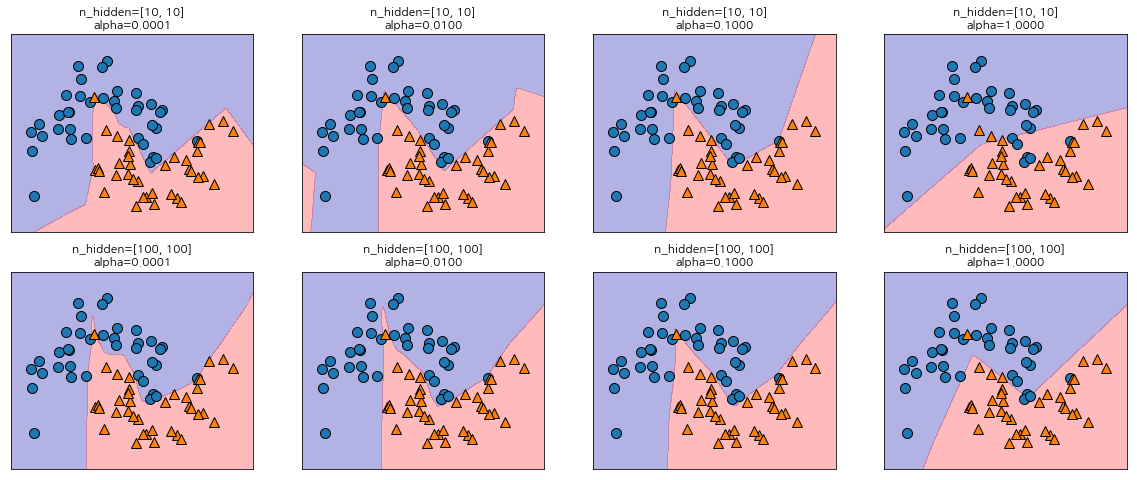

In [125]:
# L2 패널티를 사용하여, 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어한다
# alpha 는 선형모델의 매개변수와 동일한 역활로, 기본값은 '매우작게' 설정되어 있다
#  
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

In [126]:
# 모델의 해석
# 신경망의 복잡도는 은닉층의 수, 은닉층의 유닛갯수, alpha 값을 사용 가능하다

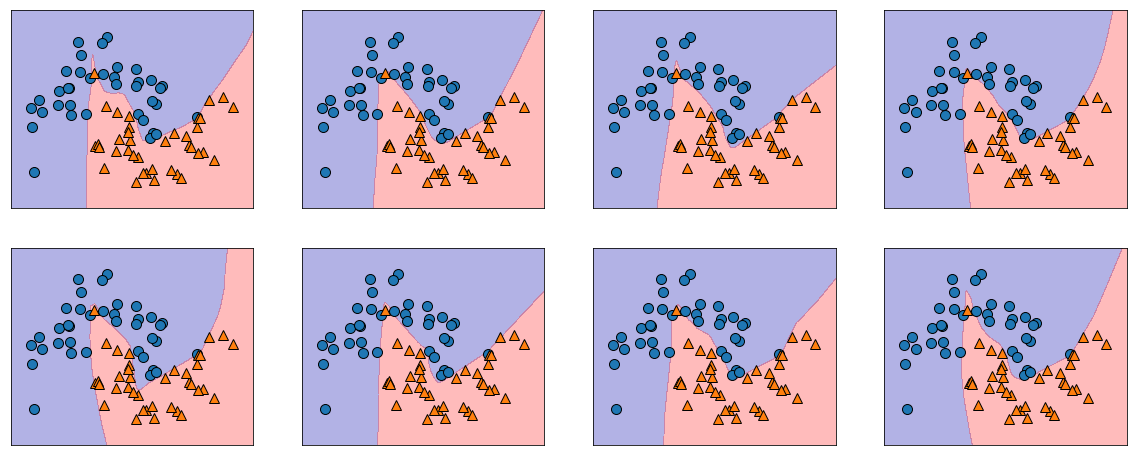

In [127]:
# 같은 매개변수여도 초기값이 다르면 모델이 달라질 수 있음에 유의하자
# 무작위로 다른 초기값을 주었으나, 같은 매개변수로 학습한 결정경계
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [128]:
# 유방암 데이터셋 (컬럼 100개) 에 MLPClassifier를 적용
# 관련 매개변수들은 기본값을 활용한다
print("Cancer data per-feature 최댓값 :\n{}".format(cancer.data.max(axis=0)))
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set    : {:.2f}".format(mlp.score(X_test, y_test)))

Cancer data per-feature 최댓값 :
[  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   3.45400000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.74400000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   7.89500000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01   2.51200000e+02   4.25400000e+03
   2.22600000e-01   1.05800000e+00   1.25200000e+00   2.91000000e-01
   6.63800000e-01   2.07500000e-01]
Accuracy on training set: 0.91
Accuracy on test set    : 0.88


In [129]:
mean_on_train = X_train.mean(axis=0) # 훈련 set의 각 특성의 평균을 계산
std_on_train = X_train.std(axis=0)   # 훈련 set의 각 특성의 표준편차를 계산

X_train_scaled = (X_train - mean_on_train) / std_on_train # Train 정규화
X_test_scaled = (X_test - mean_on_train) / std_on_train   # Test 정규화

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set    : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set    : 0.965


/home/markbaum/Python/python36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [130]:
# ConvergenceWarning 메세지는 최대반복횟수에 도달함을 알려준다
# 이는 adam 알고리즘에 관련한 것으로, 이 경고가 나오면 반복횟수를 늘려야 한다

In [131]:
# max_iter=1000 : 모델생성을 위한 반복횟수를 늘려준다
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set    : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.993
Accuracy on test set    : 0.972


In [132]:
# 모델의 해석
# 반복 횟수를 1,000으로 변경한 결과
# 훈련한 모델의 성능이 개선됨을 알 수 있다

In [133]:
# alpha=1 : '일반화성능'을 높이기 위해 ,위 모델에 복잡도를 낮춰서 설정해볼 것이다
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set    : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set    : 0.972


In [134]:
# 모델의 해석
# 지금까지 분석한 결과중 가장 양호한 결과를 출력한다

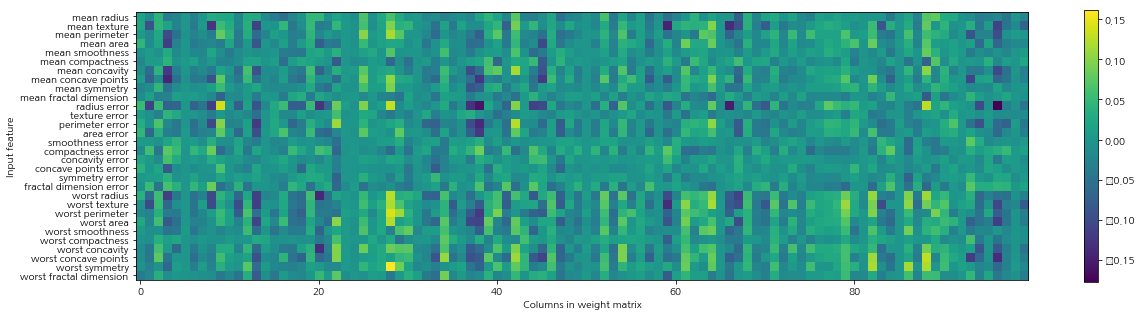

In [135]:
# row 분석은 30개의 입력 특성을 갖고
# field는 100갸의 은닉 유닛을 사용한 모델을 생성한다
# 밝은 값이 '+', 어두운 값은 '-'를 나타낸다
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [136]:
# 장단점과 매개변수
# 신경망은 복잡한 모델을 만들수 있는 장점이 존재한다
# 떄문에 오랜 시간이 걸리고, 전처리에 유의해야 하는 단점이 존재한다

# 특징
# 'SVM'과 동일하게, 동질의 데이터로 구성된 경우에 잘 작동한다
# 이질적인 데이터들로 구성된 경우에는 , 'Decision Tree'분석이 유용하다

# 복잡도 추정 
# 1. 우선 충분히 과적합된 큰 모델을 생성한다
# 2. 신경망 구조를 줄이고, alpha 값을 증가시키면서 일반화 성능을 향상하며 최적값을 찾는다

# solver 매개변수
# 1. 'adam' 기본설정 값 : 대부분에 잘 작동하나, 규모가 큰 모델에선 민감하다 (정규화가 필요한 이유)
# 2. 'lbfgs' : 안정적이나, 대량의 데이터에선 시간이 오래 걸린다 
# 3. 'sgd' : 여러 매개변수와 함께 튜닝을 통해서 최적값을 찾을 수 있다,

<br></br>
## 9  <strong>분류 예측의 불확실성 추정 </strong>
예측의 불확실성을 추정할 수 있다.

### 01 2차원 데이터 셋을 사용한 추청
1. decision_function()
2. predict_proba()

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# Target 을 "blue", "red" 로 변경
y_named = np.array(["blue", "red"])[y]

# train_test_split() 에는 여러배열을 한꺼번에 입력이 가능하다
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# Gradient Boosting 모델을 생성한다
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

### 02 결정함수
decision_function()의 반환값은 (<strong>n_samples</strong>, ) 로써,

<strong>각 샘플의 하나의 실수값</strong>을 반환한다

In [138]:
print("X_test.shape: {}".format(X_test.shape))
print("결정함수의 결과 형태 : {}".format(
      gbrt.decision_function(X_test).shape))

# 결과해석
# 데이터포인트가 양성 클래스인, 클래스 1에 속한다고 믿는 정도를 값으로 출력한다
# 양수값은 양성클래스를 의미, 음수값은 음성 클래스를 의미한다

X_test.shape: (25, 2)
결정함수의 결과 형태 : (25,)


In [139]:
# 결과 함수값 중 앞부분 일부를 확인한다
print("결정 함수:\n{}".format(gbrt.decision_function(X_test)[:6]))

# 결과해석
# 결정함수의 출력값 '부호'를 통해서 예측결과를 알 수 있다

결정 함수:
[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106]


In [140]:
# 이를 보다 구체적으로 알아보자
print("임계치와 결정함수의 결과값 비교 (Thresholded decision function) :\n{}".format(
    gbrt.decision_function(X_test) > 0))
print("예측결과 (Predictions) :\n{}".format(gbrt.predict(X_test)))

# Predict 함수결과를 완전히 재현하기 위해선 classes_속성을 사용하면 된다
# boolean 값인 True/False (0 과 1)로 변환한다

임계치와 결정함수의 결과값 비교 (Thresholded decision function) :
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
예측결과 (Predictions) :
['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [141]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# classes_에 인덱스를 사용한다
pred = gbrt.classes_[greater_zero]
# pred 와 gbrt.predict 의 결과를 비교한다
print("pred 값은 '예측결과'와 동일한가? : {}".format(
    np.all(pred == gbrt.predict(X_test))))

pred 값은 '예측결과'와 동일한가? : True


In [142]:
# .decision_function() : 입력 데이터와 모델 파라미터에 따라 달라진다
# 결과값이 임의의 숫자여서 구체적으로 이해하기는 어려운 부분이 있다

decision_function = gbrt.decision_function(X_test)
print("결정함수 최솟값: {:.2f} \n결정함수 최대값: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)))

결정함수 최솟값: -7.69 
결정함수 최대값: 4.29


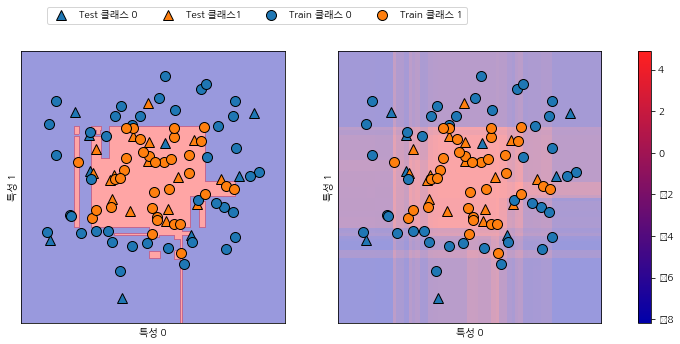

In [143]:
# .decision_function() 의 결과를 시각화
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, 
            ax = axes[0], alpha = .4, fill = True, cm = mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, 
            ax = axes[1], alpha = .4, cm = mglearn.ReBl)

for ax in axes:
    # Train/ Test 데이터를 표 위에 그리기
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test 클래스 0", "Test 클래스1", "Train 클래스 0", "Train 클래스 1"], 
               ncol=4, loc=(.1, 1.1))

In [144]:
# 모델해석
# 데이터들과 예측결과를 통해, 분류기가 얼마나 확신가능한지를 확인
# 결정함수 그래프에서 클래스0, 1 사이의 경계를 구분하기는 어려운 한계가 존재한다

### 03 예측 확률
predict_proba() : 각 클래스에 대한 확률로 decision_function() 보다 이해가 용이하다

이진분류의 경우, 항상<strong>(n_samples, 2)</strong>를 반환한다

http://bit.ly/2cqCYx6 (인위적으로 만든 여러 분류기 모델)

In [145]:
print("확률 값의 형태 : {}".format(gbrt.predict_proba(X_test).shape))

확률 값의 형태 : (25, 2)


In [146]:
# predict_proba()의 결과 중 앞부분 일부를 확인
print("Predicted probabilities:\n{}".format(
    gbrt.predict_proba(X_test[:6])))

Predicted probabilities:
[[ 0.01573626  0.98426374]
 [ 0.84575649  0.15424351]
 [ 0.98112869  0.01887131]
 [ 0.97406775  0.02593225]
 [ 0.01352142  0.98647858]
 [ 0.02504637  0.97495363]]


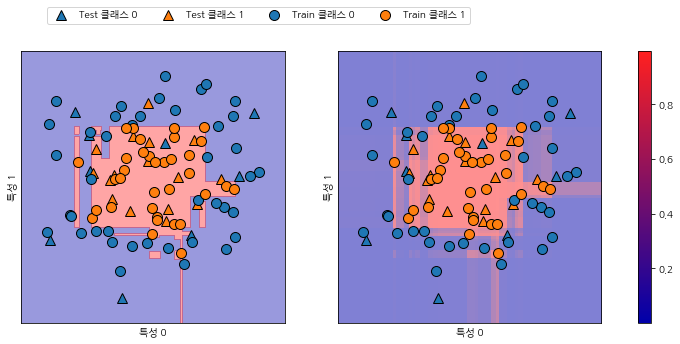

In [147]:
# 0, 1클래스의 합은 1로써, 둘 중 하나는 50% 이상의 값을 갖음이 확실하다
# 이를 응용하여 결정경계와, 클래스 1의 확률을 시각화로 표현해보자
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # training 과 test 의 포인트를 시각화
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("특성 0"); ax.set_ylabel("특성 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test 클래스 0", "Test 클래스 1", "Train 클래스 0", "Train 클래스 1"],\
               ncol=4, loc=(.1, 1.1))

In [148]:
# 결과해석
# 경계구분이 보다 명확하며, 작은 영역들도 확인이 용이하다 

### 04 다중 분류에서의 불확실성
위의 분석은 '이진분류' 데이터셋을 활용하였다

이제는 '다중분류'에 적용해보자

In [149]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

#### 1) .decision_function()
다항 모델에서 결정함수

In [150]:
print("결정 함수의 형태 (Decision function shape): {}".format(gbrt.decision_function(X_test).shape))
# plot the first few entries of the decision function
print("결정 함수의 결과 (Decision function):\n{}".format(gbrt.decision_function(X_test)[:6, :]))

결정 함수의 형태 (Decision function shape): (38, 3)
결정 함수의 결과 (Decision function):
[[-0.52931069  1.46560359 -0.50448467]
 [ 1.51154215 -0.49561142 -0.50310736]
 [-0.52379401 -0.4676268   1.51953786]
 [-0.52931069  1.46560359 -0.50448467]
 [-0.53107259  1.28190451  0.21510024]
 [ 1.51154215 -0.49561142 -0.50310736]]


In [151]:
# 다중분류의 경우 decision_function의 결과는 (n_shapes, n_shapes) 이다
# 각 열은 각 클래스에 대한 확신점수를 담고 있어서, 수치가 크면 클래스에 해당확률이 높고, 수치가 작으면 가능성이 낮다

In [152]:
print("3개 클래스 중 가장 큰 결정함수의 인덱스 (Argmax of decision function) :\n{}".format(
    np.argmax(gbrt.decision_function(X_test), axis=1)))
print("예측결과 (Predictions) :\n{}".format(gbrt.predict(X_test)))
pd.value_counts(np.argmax(gbrt.decision_function(X_test), axis=1) == gbrt.predict(X_test))

3개 클래스 중 가장 큰 결정함수의 인덱스 (Argmax of decision function) :
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
예측결과 (Predictions) :
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


True    38
dtype: int64

In [153]:
# 결과해석
# 비교결과 모두 True만 출력한다
# 예측결과는, 예측 모델 중 가장 큰 값의 인텍스를 사용하여 예측한다

#### 2) .predict_proba
다항 모델에서의 예측확률

In [154]:
# show the first few entries of predict_proba
print("예측 확률 (Predicted probabilities) :\n{}".format(gbrt.predict_proba(X_test)[:6]))
# show that sums across rows are one
print("각 열의 합 (Sums): {}".format(gbrt.predict_proba(X_test)[:6].sum(axis=1)))

예측 확률 (Predicted probabilities) :
[[ 0.10664722  0.7840248   0.10932798]
 [ 0.78880668  0.10599243  0.10520089]
 [ 0.10231173  0.10822274  0.78946553]
 [ 0.10664722  0.7840248   0.10932798]
 [ 0.10825347  0.66344934  0.22829719]
 [ 0.78880668  0.10599243  0.10520089]]
각 열의 합 (Sums): [ 1.  1.  1.  1.  1.  1.]


In [155]:
print("Argmax of predicted probabilities:\n{}".format(
    np.argmax(gbrt.predict_proba(X_test), axis=1)))
print("Predictions:\n{}".format(gbrt.predict(X_test)))

pd.value_counts(np.argmax(gbrt.predict_proba(X_test), axis=1) == gbrt.predict(X_test))

Argmax of predicted probabilities:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
Predictions:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


True    38
dtype: int64

In [156]:
# 비교결과 모두 True만 출력한다
# 다중분류의 경우 predict_proba의 결과도 (n_shapes, n_shapes) 이다
# 각 열은 각 클래스에 대한 확신점수를 담고 있어서, 수치가 크면 클래스에 해당확률이 높고, 수치가 작으면 가능성이 낮다

In [157]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("Train 데이터의 클래스 종류 (unique classes in training data): {}".format(logreg.classes_))
print("\n예측결과 (predictions): \n{}".format(logreg.predict(X_test)[:10]))

argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("\n가장 큰 결정 함수의 인덱스 (argmax of decision function): {}".format(argmax_dec_func[:10]))
print("\n인덱스를 classes_와 연결 (argmax combined with classes_): \n{}".format(
    logreg.classes_[argmax_dec_func][:10]))

pd.value_counts(logreg.predict(X_test) == logreg.classes_[argmax_dec_func])

Train 데이터의 클래스 종류 (unique classes in training data): ['setosa' 'versicolor' 'virginica']

예측결과 (predictions): 
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']

가장 큰 결정 함수의 인덱스 (argmax of decision function): [1 0 2 1 1 0 1 2 1 1]

인덱스를 classes_와 연결 (argmax combined with classes_): 
['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor']


True    38
dtype: int64

In [158]:
# 요약 및 정리
# 좋은 성능으 위해서는 매개변수를 잘 조절하는 것이 필요하다
# 1. 최근접 이웃 : 작은 데이터 셋에 적용간으한 기본모델
# 2. 선형 모델 : 처음 시도 용이한 알고리즘으로 대용량 고차원에도 가능하다 (일반화가 강하다)
# 3. 나이브 베이즈 : 분류모델(회귀X) 선형보다 빠르고 고차원에도 가능, 선형보단 정확도는 낮다
# 4. 결정나무 : 매우 빠르고 스케일 조절 불필요 (깊이만 제한), 시각화 및 설명에 용이
# 5. RandomForest : 강력하고 안정적, 다만 고차원 희소 데이터셋에는 부적합
# 6. GradientBoostingDecisionTree : RandomForest보다 조금 성능이 양호, 학습은 느리나 예측은 빠르고 메모리를 덜 사용한다, 많은 튜닝이 필요
# 7. SupportVectorMachine : 비슷한 특성으로 이루어진 중간 데이터셋에 잘 맞는다. 매개변수에 민감하고 스케일 조절이 필요하다
# 8. 신경망 모델 : 대용량 데이터셋에서 복잡한 모델을 생성가능, 매개변수와 스케일에 민감, 학습시 오랜시간 소요